In [9]:
import pandas as pd
#Problem 1

#1 Load the provided dataset and import in pandas DataFrame.
data_set = '/content/drive/MyDrive/Python Sem 3 Workshop /dataset/bank.csv'
df = pd.read_csv(data_set)

#2 Check info of the DataFrame and identify following:
# a Columns with dtypes=object
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:", object_columns)

# b Unique Values of those Columns
for col in object_columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':", unique_values)

# c check for the total number of null values in each column.
null_value = df.isnull().sum
print("Total number of null values", null_value)

#3 Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”
drop_columns = df.drop(columns=object_columns)
output_file = r"/content/drive/MyDrive/Python Sem 3 Workshop /dataset/banknumericdata.csv"
drop_columns.to_csv(output_file,index = False)
print(f"DataFrame with numeric columns saved to '{output_file}'.")

#4 Read ”banknumericdata.csv” and Find the summary statistics
df = pd.read_csv(output_file)
summary_statistics = df.describe()
print("Summary statistics:")
print(summary_statistics)







Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in column 'y': ['no' 'yes']
Total number of null values <bound method DataFrame.sum of          age 

In [18]:
import pandas as pd

#1 Load the provided dataset and import in pandas DataFrame.
data_set = '/content/drive/MyDrive/Python Sem 3 Workshop /dataset/medical_students_dataset.csv'
df = pd.read_csv(data_set)

#2 Check info of the DataFrame and identify column with missing (null) values.
print(df.info())
null_values = df.columns[df.isnull().any()]
print("Total number of null values", null_values)

#3 For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.
for column in null_values:
   if df[column].dtype == 'object':
    #Fill missing values with  the most frequent value mode
     mode = df[column].mode()[0]
     print("The value is replaced with",mode)
   else:
     #Fill missing values in numeric columns with the mean
     mean = df[column].mean()
     df[column].fillna(mean, inplace=True)
     print("The value is replaced with",mean)

#4 Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
duplicate_rows = df.duplicated().sum()
print("Total number of duplicate values", duplicate_rows)
df.drop_duplicates(inplace=True)
print("Duplicates removed.")

new_file = r'/content/drive/MyDrive/Python Sem 3 Workshop /dataset/new_medical_students_dataset.csv'
df.to_csv(new_file, index=False)
print(f"DataFrame with numeric columns saved to '{new_file}'.")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Total number of null values Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate'

<ipython-input-18-fe2adde0b6ad>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean, inplace=True)


Total number of duplicate values 7644
Duplicates removed.
DataFrame with numeric columns saved to '/content/drive/MyDrive/Python Sem 3 Workshop /dataset/new_medical_students_dataset.csv'.


Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0
Total number of null values 30
Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.283

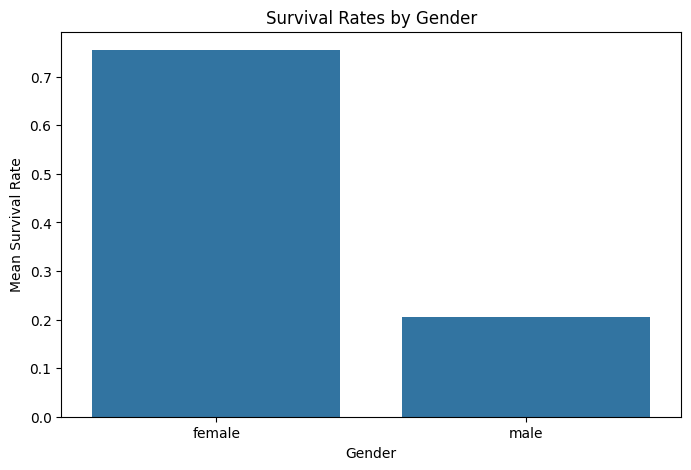

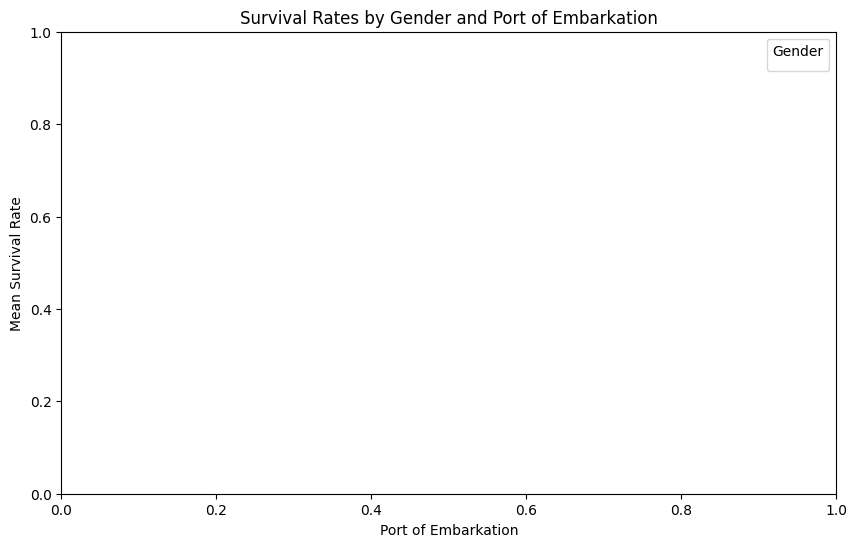

<ipython-input-34-72305cf2f63e>:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


    Pclass AgeGroup  Survived
0        1       Q1  0.809524
1        1       Q2  0.761905
2        1       Q3  0.666667
3        1       Q4  0.777778
4        1       Q5  0.506667
5        2       Q1  0.742857
6        2       Q2  0.400000
7        2       Q3  0.416667
8        2       Q4  0.461538
9        2       Q5  0.363636
10       3       Q1  0.333333
11       3       Q2  0.197674
12       3       Q3  0.283582
13       3       Q4  0.166667
14       3       Q5  0.088235


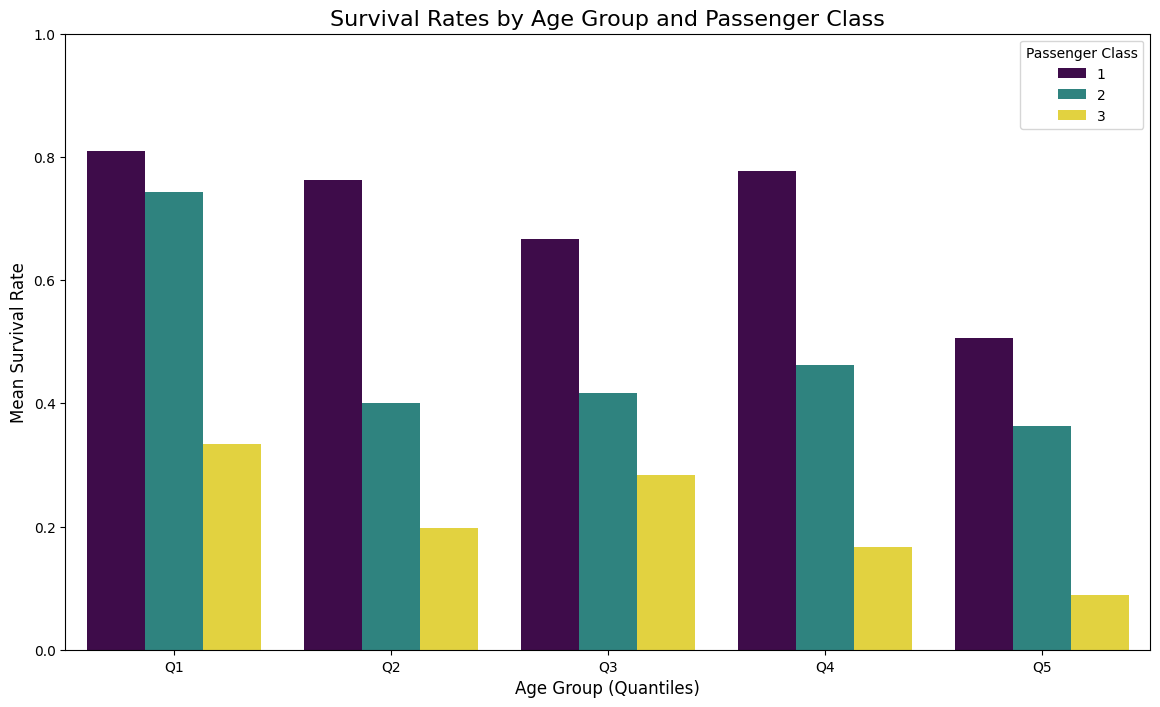

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_set = '/content/drive/MyDrive/Python Sem 3 Workshop /dataset/Titanic-Dataset.csv'
df = pd.read_csv(data_set)

#1Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?
new_dataframe = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

#aRetain only those rows where ’Pclass’ is equal to 1, representing first-class passengers.
first_class_df = new_dataframe[new_dataframe['Pclass'] == 1]

#bWhat is the mean,median, maximum value, and minimum value of the ’Fare’ column?
mean = first_class_df['Fare'].mean()
median = first_class_df['Fare'].median()
maximum = first_class_df['Fare'].max()
minimum = first_class_df['Fare'].min()

print("Mean:", mean)
print("Median:", median)
print("Maximum:", maximum)
print("Minimum:", minimum)

#2 How many null values are contained in the ’Age’ column in your subsetted DataFrame?
null_values = first_class_df['Age'].isnull().sum()
print("Total number of null values", null_values)

#Once you’ve found this out, drop them from your DataFrame.
df.dropna(subset=['Age'], inplace=True)

#3The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-tion:• ’C’ for Cherbourg• ’Q’ for Queenstown• ’S’ for Southampton
encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, encoded], axis=1)
df.drop(columns=['Embarked'], inplace=True)
print("Modified DataFrame:")
print(df.head())
df.to_csv(r'/content/drive/MyDrive/Python Sem 3 Workshop /dataset/modified_Titanic-Dataset.csv', index=False)


#4Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-ization to show how the survival distributions vary by gender.
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(survival_by_gender)
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

#Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
plt.figure(figsize=(10, 6))
# sns.barplot(x='Embarked', y='Survived', hue='Sex', data=encoded, palette='coolwarm')
plt.title('Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.legend(title='Gender')
plt.show()

df = df.dropna(subset=['Age', 'Survived', 'Pclass'])
df['AgeGroup'] = pd.qcut(df['Age'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
survival_rates = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()
print(survival_rates)

plt.figure(figsize=(14, 8))
sns.barplot(data=survival_rates, x='AgeGroup', y='Survived', hue='Pclass', palette='viridis')
plt.title('Survival Rates by Age Group and Passenger Class', fontsize=16)
plt.xlabel('Age Group (Quantiles)', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Passenger Class', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
